(a) k_d=2.750584049841053e-06
(b) mean_kp_kt=6.669038
(c) init_kp_kt=6.318975


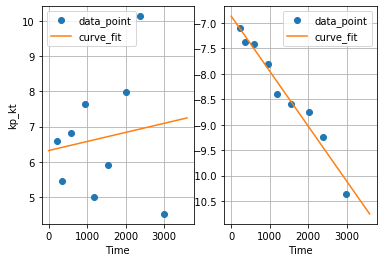

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

t = np.array([[0],[225],[350],[590],[950],[1190],[1550],[2020],[2390],[2990],[3600]])
X_A = np.array([[0],[0.235],[0.313],[0.462],[0.676],[0.730],[0.810],[0.880],[0.942],[0.958],[0.98]])

k_d = np.log(2)/(70*60*60)
print ('(a) k_d=%s'%(k_d))

C_M0 = 2.0 # mol/L
C_I0 = 0.01 # mol/L
C_M=C_M0*(1-X_A)
C_I=C_I0*np.exp(-k_d*t)

r_XA=[]
for i in range (9):
    r_XA.append (0.5*(X_A[i+1]-X_A[i])/(t[i+1]-t[i])+0.5*(X_A[i+2]-X_A[i+1])/(t[i+2]-t[i+1]))

kp_kt=[]
for i in range (9):
    kp_kt.append (2*r_XA[i]/(C_M[i+1]*((k_d*C_I[i+1])**0.5)))
    
print ('(b) mean_kp_kt=%f'%(np.mean(kp_kt)))

reg_1 = linear_model.LinearRegression()
reg_1.fit (t[1:10], kp_kt)
slope_1, interc_1 =reg_1.coef_, reg_1.intercept_

print ('(c) init_kp_kt=%f'%(interc_1))

reg_2 = linear_model.LinearRegression()
reg_2.fit (t[1:10], np.log(r_XA))
slope_2, interc_2 =reg_2.coef_, reg_2.intercept_

plt.subplot (122)
plt.plot (t[1:10], np.log(r_XA),'o',label='data_point')
plt.plot (t,interc_2+slope_2*t, label='curve_fit')
plt.xlabel ('Time')
plt.ylabel ('log(r_XA)')
plt.legend (loc='best')
plt.grid (1)

plt.subplot (121)
plt.plot (t[1:10],kp_kt,'o', label='data_point')
plt.plot (t[0:11],interc_1+slope_1*t[0:11], label='curve_fit')
plt.xlabel ('Time')
plt.ylabel ('kp_kt')
plt.legend (loc='best')
plt.grid (1)
plt.show()


In [13]:
# Q2
import numpy as np

P_A0 = 5 # atm
P_0 = 10 # atm
P_t = 12 # atm
k = 0.1 # min**-1 

t = (np.log(P_A0/(P_A0-(P_t-P_0))))/(k)
print (t)

5.108256237659907


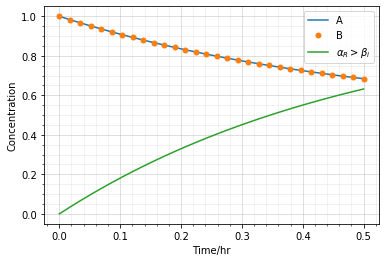

C_C=0.632083 mol/(L*hr)


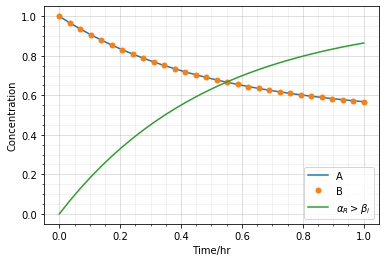

C_C=0.864572 mol/(L*hr)


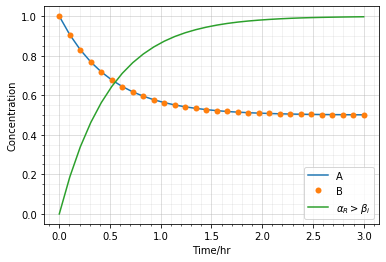

C_C=0.997424 mol/(L*hr)


In [23]:
# Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

k=[1.0, 0.25] 

def dc_dt (t, C):
    dcdt = [-k[0]*C[0]*C[1]+k[1]*C[2]**2,
            -k[0]*C[0]*C[1]+k[1]*C[2]**2,
            2*(k[0]*C[0]*C[1]-k[1]*C[2]**2)]
    return dcdt
# C_A = (1+1/(np.exp(2*t)))/2

C_init = [1, 1, 0] # mol/L
for i in (0.5, 1, 3):
    t=np.linspace(0,i,30)
    sol = solve_ivp (dc_dt, [0,i], C_init, t_eval=t)
    plt.plot (sol.t, sol.y[0], label='A')
    plt.plot (sol.t, sol.y[1],'o',mew='0', label='B')
    plt.plot (sol.t, sol.y[2], label=r'$\alpha_R > \beta_i$')
    plt.xlabel ('Time/hr')
    plt.ylabel ('Concentration')
    plt.legend (loc='best')
    plt.grid(b=1,which='major', linestyle='-',alpha=0.5)
    plt.minorticks_on()
    plt.grid(b=True, which='minor',linestyle='-', alpha=0.2)
    plt.show ()
    print ('C_C=%f mol/(L*hr)'%(sol.y[2][29]))




In [15]:
# Q4
from sklearn import linear_model

u = 50 # cm/sec
t=(np.array([[0], [20], [40], [60], [80], [100]]))/u
CA_CA0= np.array ([[1], [0.45], [0.2], [0.091], [0.04], [0.018]])

reg = linear_model.LinearRegression()
reg.fit (t, np.log(CA_CA0))
k_1=-reg.coef_
print('(i) k_1= %f' %(k_1))

k_2 =k_1/2
t_max = (np.log(k_2/k_1))/(k_2-k_1)
print ('(iii)t_max_B=%f'%(t_max), 'y_max_B=%f' %(t_max*50))

(i) k_1= 2.009677
(iii)t_max_B=0.689809 y_max_B=34.490475


In [18]:
print (r'$\alpha_i > \beta_i$')

$\alpha_i > \beta_i$
